In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [5]:
# Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# Display the first few rows of the dataset
print(data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [7]:
# Separate features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Train SVM with Linear Kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Train SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Train SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train, y_train)

SVC(kernel='poly', random_state=42)

In [11]:
# Make predictions
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)

# Evaluate the models
print("Linear Kernel Classification Report:\n", classification_report(y_test, y_pred_linear))
print("RBF Kernel Classification Report:\n", classification_report(y_test, y_pred_rbf))
print("Polynomial Kernel Classification Report:\n", classification_report(y_test, y_pred_poly))

# Confusion Matrices
confusion_linear = confusion_matrix(y_test, y_pred_linear)
confusion_rbf = confusion_matrix(y_test, y_pred_rbf)
confusion_poly = confusion_matrix(y_test, y_pred_poly)

print("Confusion Matrix for Linear Kernel:\n", confusion_linear)
print("Confusion Matrix for RBF Kernel:\n", confusion_rbf)
print("Confusion Matrix for Polynomial Kernel:\n", confusion_poly)

Linear Kernel Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.60      0.77      0.68       130
           6       0.51      0.60      0.55       132
           7       0.00      0.00      0.00        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.19      0.23      0.20       320
weighted avg       0.46      0.56      0.50       320

RBF Kernel Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.65      0.76      0.70       130
           6       0.56      0.64      0.60       132
           7       0.56      0.21      0.31        42
           8       0.00      0.00      0.00         5

    

C:\Users\gande\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gande\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gande\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gande\anaconda3\Lib\site-packag

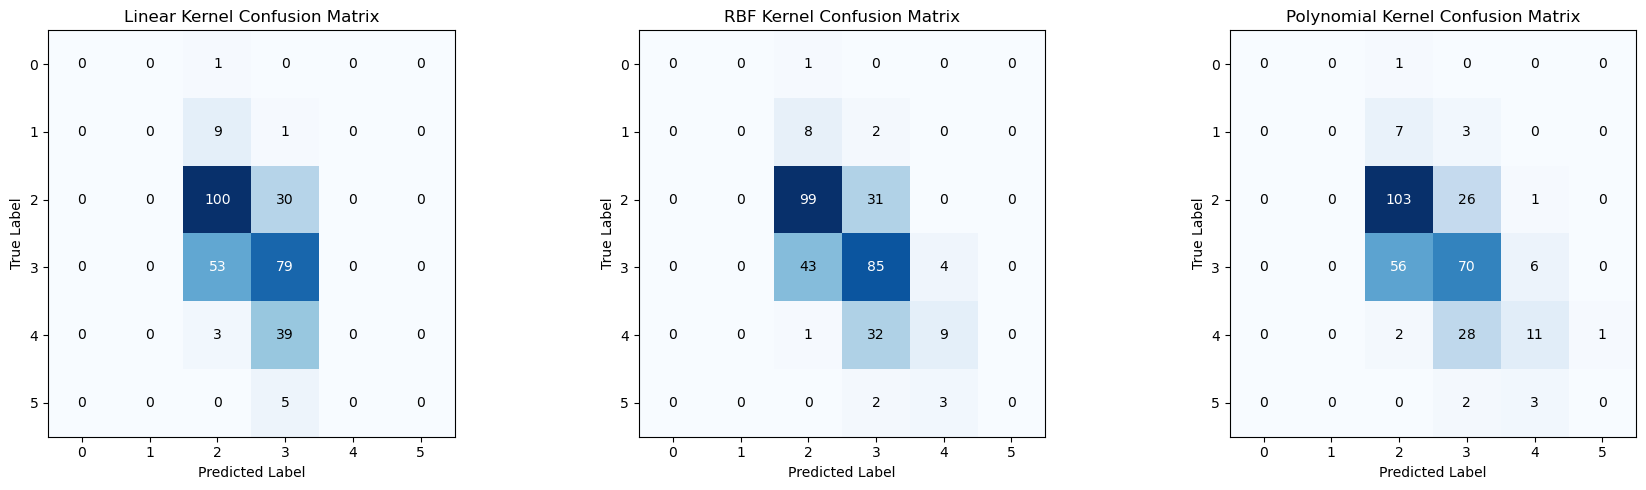

In [13]:
# Visualize the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Linear Kernel Confusion Matrix
axes[0].imshow(confusion_linear, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Linear Kernel Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
for i in range(confusion_linear.shape[0]):
    for j in range(confusion_linear.shape[1]):
        axes[0].text(j, i, confusion_linear[i, j], ha='center', va='center', color='white' if confusion_linear[i, j] > confusion_linear.max()/2 else 'black')

# RBF Kernel Confusion Matrix
axes[1].imshow(confusion_rbf, interpolation='nearest', cmap= plt.cm.Blues)
axes[1].set_title('RBF Kernel Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
for i in range(confusion_rbf.shape[0]):
    for j in range(confusion_rbf.shape[1]):
        axes[1].text(j, i, confusion_rbf[i, j], ha='center', va='center', color='white' if confusion_rbf[i, j] > confusion_rbf.max()/2 else 'black')

# Polynomial Kernel Confusion Matrix
axes[2].imshow(confusion_poly, interpolation='nearest', cmap=plt.cm.Blues)
axes[2].set_title('Polynomial Kernel Confusion Matrix')
axes[2].set_xlabel('Predicted Label')
axes[2].set_ylabel('True Label')
for i in range(confusion_poly.shape[0]):
    for j in range(confusion_poly.shape[1]):
        axes[2].text(j, i, confusion_poly[i, j], ha='center', va='center', color='white' if confusion_poly[i, j] > confusion_poly.max()/2 else 'black')

plt.tight_layout()
plt.show()